<a href="https://colab.research.google.com/github/rajni0829/2021/blob/master/DNN_Lab6_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name : Rajni Gupta  
PRN : 20190802012  
Subject : DNN  
Lab : 06  
Dataset Used : Inbuilt Iris Dataset Library


In [238]:
import sys
import scipy
import matplotlib as plt 
import pandas as pd
import sklearn
from  sklearn import  datasets


1.	Getting the dataset

In [162]:
from sklearn.datasets import load_iris

iris = load_iris()

x = iris.data
y = iris.target
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [163]:
iris['DESCR']

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [164]:
df = pd.DataFrame(iris['data'],columns=iris['feature_names'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [165]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Splitting Data into training and validation set with ratio 8:2

In [166]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.8)

2.	Representing data into a structure

In [167]:
len(iris)

8

<Figure size 432x288 with 0 Axes>

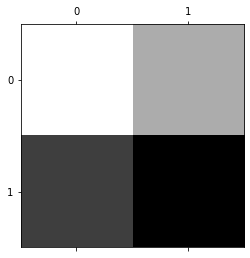

In [196]:
# iris.data[0].reshape(8,8)
import matplotlib.pyplot as plt

%matplotlib inline
plt.gray()

# plt.gray()
plt.matshow(iris.data[0].reshape(2,2))


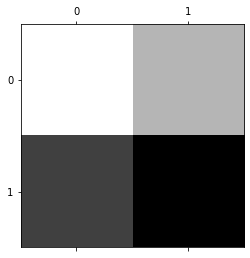

In [197]:
plt.matshow(iris.data[4].reshape(2,2))

In [168]:
# converts all values between 0 to 1
from sklearn.preprocessing import MinMaxScaler


3.	Standardizing the data

In [169]:
from sklearn.preprocessing import StandardScaler

# Standardizing the features : std dev = 1, mean = 0 
scalar = StandardScaler()
scalar.fit(df)

sc = scalar.transform(df)

In [170]:
sc

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [171]:
# applying PCA technique 

from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [172]:
pca.fit(sc)
sc

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [173]:
Z = pca.transform(sc)
Z

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

In [174]:
sc.shape

(150, 4)

In [175]:
Z.shape   # here, we can see the dimension has reduced from 4 to 2

(150, 2)

 4)	Calculating the covariance 

In [176]:
import numpy as np
cov = np.cov(Z, rowvar = False)
cov

array([[2.93808505e+00, 9.15574351e-16],
       [9.15574351e-16, 9.20164904e-01]])

 5.i)	Calculating the Eigen Values and Eigen Vectors

In [177]:
eigenvalues,eigenvectors = np.linalg.eig(cov)


In [178]:
eigenvalues

array([2.93808505, 0.9201649 ])

In [179]:
eigenvectors

array([[ 1.00000000e+00, -4.53721795e-16],
       [ 4.53721795e-16,  1.00000000e+00]])

6.	Sorting the Eigen Vectors

In [180]:
idx = eigenvalues.argsort()   
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

In [181]:
eigenvalues

array([0.9201649 , 2.93808505])

In [182]:
P = eigenvectors
P

array([[-4.53721795e-16,  1.00000000e+00],
       [ 1.00000000e+00,  4.53721795e-16]])

7.	Calculating the new features Or Principal Components

In [202]:
h = iris.data[0].reshape(2,2)
# resultant = P.dot(Z)


resultant = P*Z
resultant

array([[-2.31398116e-15,  3.50000000e+00],
       [ 1.40000000e+00,  9.07443591e-17]])

In [189]:
iris.data.shape

(150, 4)

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

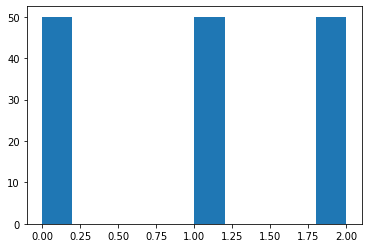

In [222]:
plt.hist(target)


In [223]:
from sklearn import datasets
import seaborn as sns

# load data to dict derived class Bunch
iris = datasets.load_iris()
target = datasets.load_iris().target


# convert to dataframe for processing 
iris = pd.DataFrame(iris.data, columns = iris.feature_names)


In [224]:
#to normalize dataset, we use this handy MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(iris)
iris_norm=scaler.transform(iris)



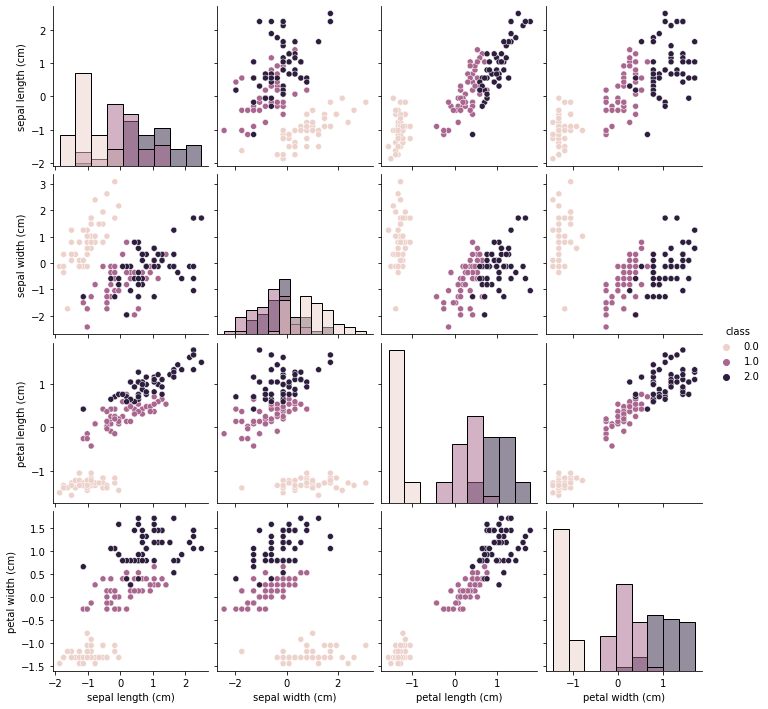

In [226]:

# visualizing features and target
iris_norm = pd.DataFrame(sc, columns = iris.columns)
iris_norm_ = pd.DataFrame(np.hstack((iris_norm, target[:, np.newaxis])), columns = iris.columns.tolist() + ['class'])
sns.pairplot(iris_norm_, hue = 'class', diag_kind='hist')

In [229]:
from sklearn.feature_selection import SelectKBest, f_classif

#to normalize dataset, we use this handy MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(iris)
iris_norm=scaler.transform(iris)

In [233]:
# Performing Feature Selection to remove irrelevent features

bestfeatures = SelectKBest(score_func=f_classif, k=3)
iris_trim = bestfeatures.fit_transform(iris_norm, target)


In [235]:
bestfeatures.scores_

array([ 119.26450218,   49.16004009, 1180.16118225,  960.0071468 ])

In [236]:
bestfeatures.pvalues_

array([1.66966919e-31, 4.49201713e-17, 2.85677661e-91, 4.16944584e-85])

In [237]:
iris_trim.shape

(150, 3)

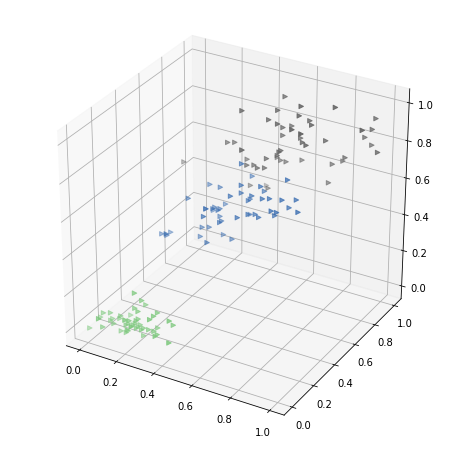

In [228]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.scatter3D(iris_trim[:, 0], iris_trim[:, 1], iris_trim[:, 2], c = target, cmap='Accent', marker = '>')